# Libraries used

Running Kernel3.9.13 base anaconda

pip install squarify
pip install yellowbrick
pip install plotly
pip install seaborn
pip install lazypredict
pip install pandas_profiling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.io as pio
import os
import matplotlib
import warnings

from imblearn.over_sampling import SMOTE


#to enable the inline plotting
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [2]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#rfc using regularization and gridsearch to find the best parameters for the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.stats import normaltest

from pandas_profiling import ProfileReport

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette

import lazypredict
from lazypredict.Supervised import LazyClassifier


warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Function for EDA. Using the display() function to have  well-formatted tables. We are mainly using pandas to explore the datasets

def dataset_description(df_target):

    print('This is the Dataset shape: %s\n' % (df_target.shape, ))
    print('Dataset columns: %s\n' % df_target.columns)

    print('\nColumns description:\n')
    display(df_target.info())
    display(df_target.describe())  # describe the dataset

    print('\nNull values:\n')
    display(df_target.isnull().sum())  # Identify null values

#function performing a quick check on df_inspection to have best of pandas functions separated by a line
def quick_check(dataframe):
    print('First 5 rows %s\n')
    print(dataframe.head(2))
    print("=====================================")
    print('Dataframe shape %s\n')
    print(dataframe.shape)
    print("=====================================")
    print('Dataframe describe categorical %s\n')
    print(dataframe.describe(include=['O']))
    print("=====================================")
    print('Dataframe null values %s\n')
    print(dataframe.isnull().sum())
    print("=====================================")
    print('Dataframe value counts %s\n')
    print(dataframe.value_counts())
    print("=====================================")

#stats function
def stats(dataframe):
    print('Dataframe correlation %s\n')
    print(dataframe.corr())
    print("=====================================")
    print('Dataframe covariance %s\n')
    print(dataframe.cov())
    print("=====================================")
    print('Dataframe skew %s\n')
    print(dataframe.skew())
    print("=====================================")
    print('Dataframe kurtosis %s\n')
    print(dataframe.kurt())
    print("=====================================")

#create a function to normalize characters from a dataset's column in Spanish
def normalize_characters(df, column):
    df[column] = df[column].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace('á', 'a')
    df[column] = df[column].str.replace('é', 'e')
    df[column] = df[column].str.replace('í', 'i')
    df[column] = df[column].str.replace('ó', 'o')
    df[column] = df[column].str.replace('ú', 'u')
    df[column] = df[column].str.replace('ñ', 'n')
    df[column] = df[column].str.replace('ü', 'u')
    df[column] = df[column].str.replace('ç', 'c')
    df[column] = df[column].str.replace('(', '')
    df[column] = df[column].str.replace(')', '')
    df[column] = df[column].str.replace('\'', '')
    df[column] = df[column].str.replace('´', '')
    df[column] = df[column].str.replace('`', '')
    df[column] = df[column].str.replace('’', '')
    return df.head(2)

#create function to change detypes in64 to int32 in a df
def change_dtypes(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
    return df

def outlier_function(df, col_name):
    """ this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively"""
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                        
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                    
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
        else:
            pass
    return lower_limit, upper_limit, outlier_count

In [4]:
#show all print outputs when using a function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#display all columns
pd.set_option('display.max_columns', None)


# Importing previous dataset

In [5]:
#point to the folder where the data is stored
os.chdir(r"C:\Users\pedro\datathon")

# Loading combined_mod dataset
train_consolidated = pd.read_csv('df_baseline.csv')
sample_submission = pd.read_csv('submission_sample_prepared2.csv')

In [7]:
train_consolidated = train_consolidated[sample_submission.columns]

In [ ]:
#input null values in sample_submission with mean of the column
sample_submission['Yearly Sun Hours (hours)'] = sample_submission['Yearly Sun Hours (hours)'].fillna(sample_submission['Yearly Sun Hours (hours)'].mean())


#pandas profiling report for train_consolidated exporting a file
profile = ProfileReport(train_consolidated, title='Pandas Profiling Report', explorative=True)
profile.to_file("train_consolidated.html")


In [8]:
train_consolidated.head(1)

,PipeId,Incidence,Diameter,Length,Pressure,NumConnections,aspect,Relative_Thickness,area_connection,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Yearly Sun Hours (hours),Average_MonthsLastRev,MonthsLastRev,No_Inspections,No_Incidences_Total,Age_pipe_at_inspection,Population density (persons/sqkm)
0,489616,0,0.09,0.08,0.02,0.00,0.05,0.01,0.00,1,0,0,0,1,0,0.71,0.28,0.41,0.00,0.00,0.02,0.02


In [9]:
#creating a subset for altering the dataset after initial EDA
df_baseline = train_consolidated.copy()


In [10]:
df_baseline.head(1)

,PipeId,Incidence,Diameter,Length,Pressure,NumConnections,aspect,Relative_Thickness,area_connection,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Yearly Sun Hours (hours),Average_MonthsLastRev,MonthsLastRev,No_Inspections,No_Incidences_Total,Age_pipe_at_inspection,Population density (persons/sqkm)
0,489616,0,0.09,0.08,0.02,0.00,0.05,0.01,0.00,1,0,0,0,1,0,0.71,0.28,0.41,0.00,0.00,0.02,0.02


In [11]:
#count values for Incidence
df_baseline['Incidence'].value_counts()


0    4525778
1       4642
Name: Incidence, dtype: int64

# Approach 1: Stratifying with undersampling 


In [12]:
#undersampling the dataset
df_baseline_undersampling = df_baseline.groupby('Incidence').apply(lambda x: x.sample(df_baseline['Incidence'].value_counts().min(), random_state=42)).reset_index(drop=True)

df_baseline_undersampling['Incidence'].value_counts()


0    4642
1    4642
Name: Incidence, dtype: int64

# Approach 2 : SMOTE to tackle the unbalanced dataset problem

#using SMOTE to balance the dataset creating a subset dataset with target y = 'Incidence' and removing Incidence','MonthsLastRev','InspectionDay','PipeId', 'MaintenanceId', 'InspectionYear', 'InspectionDate',  'Province', 'Town', 'YearBuilt' for x
X = df_baseline.drop(['PipeId','Province', 'Town'], axis=1)
y = df_baseline['Incidence']
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_res.shape,y_res.shape

#create a pandas dataframe with the new balanced dataset
df_baseline_balanced = pd.DataFrame(X_res, columns=X.columns)
df_baseline_balanced['Incidence'] = y_res
df_baseline_balanced.head()


In [13]:
#using SMOTE to balance the dataset creating a subset dataset with target y = 'Incidence'
X = df_baseline.drop('Incidence', axis=1)
y = df_baseline['Incidence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

#count values for Incidence in y_train
y_train.value_counts()



0    3620619
1    3620619
Name: Incidence, dtype: int64

# Baseline approach


## Random Forest Classifier

# Trying model 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished


RandomForestClassifier(class_weight='balanced', max_depth=2,
                       max_features='auto', n_jobs=-1, random_state=42,
                       verbose=1)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.9s finished


              precision    recall  f1-score   support

           0       1.00      0.98      0.99    905159
           1       0.05      0.94      0.09       925

    accuracy                           0.98    906084
   macro avg       0.52      0.96      0.54    906084
weighted avg       1.00      0.98      0.99    906084

[[887361  17798]
 [    56    869]]
0.9802954251482202


<Figure size 1000x600 with 0 Axes>

<AxesSubplot: >

Text(0.5, 1.0, 'Confusion Matrix')

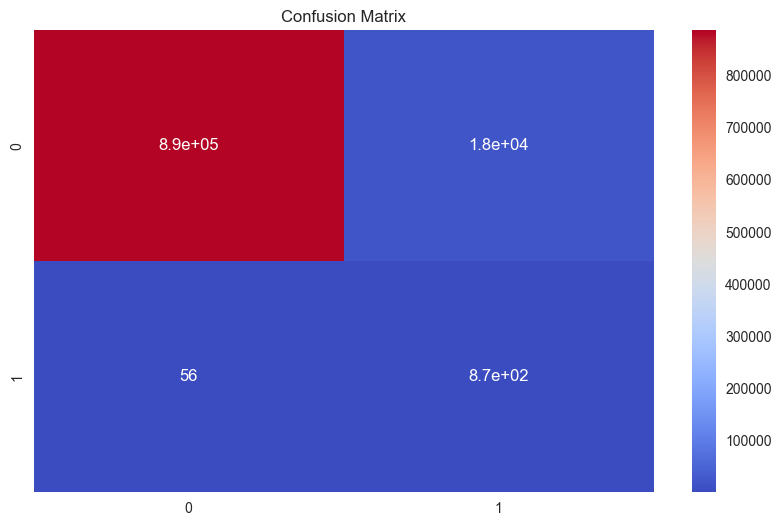

In [14]:
#random forest classifier with regularization and gridsearch to find the best parameters for the model
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth = 2, verbose=1, n_estimators=100, max_features='auto', min_samples_leaf=1, min_samples_split=2, class_weight='balanced' )
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

In [15]:
predictions = rfc.predict_proba(X_test)
predictions = predictions[:, 1]

#show accuracy score
print(accuracy_score(y_test, y_pred))


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s


0.9802954251482202


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.9s finished


In [17]:
#show classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    905159
           1       0.05      0.94      0.09       925

    accuracy                           0.98    906084
   macro avg       0.52      0.96      0.54    906084
weighted avg       1.00      0.98      0.99    906084



In [18]:
#use model to predict on test set
predictions = rfc.predict_proba(X_test)
predictions = predictions[:, 1]

#show accuracy score
print(accuracy_score(y_test, y_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s


0.9802954251482202


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.9s finished


In [24]:
#count null in sample_submission
sample_submission.isnull().sum()

PipeId                                      0
Incidence                                   0
Diameter                                    0
Length                                      0
Pressure                                    0
NumConnections                              0
aspect                                      0
Relative_Thickness                          0
area_connection                             0
gas_natural                                 0
Material_Acrylonitrile-Butadiene-Styrene    0
Material_Copper                             0
Material_Fiberglass-Reinforced Plastic      0
Material_Polyethylene                       0
Material_Polypropylene                      0
Yearly Sun Hours (hours)                    0
Average_MonthsLastRev                       0
MonthsLastRev                               0
No_Inspections                              0
No_Incidences_Total                         0
Age_pipe_at_inspection                      0
Population density (persons/sqkm) 

In [26]:
sample_submission.head(10)

,PipeId,Incidence,Diameter,Length,Pressure,NumConnections,aspect,Relative_Thickness,area_connection,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Yearly Sun Hours (hours),Average_MonthsLastRev,MonthsLastRev,No_Inspections,No_Incidences_Total,Age_pipe_at_inspection,Population density (persons/sqkm)
0,446859944,0,0.17,0.01,0.00,0.00,0.00,0.03,0.00,1.00,0,0,0,1,0,0.83,0.75,0.76,0.36,0.00,0.26,0.28
1,428124500,0,0.25,0.02,0.00,0.02,0.00,0.04,0.00,1.00,0,0,0,1,0,0.83,0.75,0.76,0.36,0.00,0.26,0.28
2,438428871,0,0.17,0.00,0.00,0.00,0.00,0.03,0.00,1.00,0,0,0,1,0,0.83,0.75,0.76,0.36,0.00,0.26,0.28
3,429034569,0,0.17,0.05,0.00,0.03,0.00,0.03,0.00,1.00,0,0,0,1,0,0.83,0.75,0.76,0.36,0.00,0.26,0.28
4,411184477,0,0.32,0.13,0.00,0.00,0.00,0.05,0.00,1.00,0,0,0,1,0,0.83,0.76,0.76,0.36,0.00,0.29,0.28
5,428837983,0,0.17,0.01,0.00,0.00,0.00,0.03,0.00,1.00,0,0,0,1,0,0.83,0.75,0.76,0.36,0.00,0.26,0.28
6,428837841,0,0.17,0.02,0.00,0.00,0.00,0.03,0.00,1.00,0,0,0,1,0,0.83,0.75,0.76,0.36,0.00,0.26,0.28
7,428838331,0,0.17,0.01,0.00,0.03,0.00,0.03,0.00,1.00,0,0,0,1,0,0.83,0.75,0.76,0.36,0.00,0.26,0.28
8,1200432,0,0.17,0.02,0.00,0.05,0.00,0.03,0.00,1.00,0,0,0,1,0,0.83,0.75,0.76,0.36,0.00,0.26,0.28
9,1200564,0,0.17,0.00,0.00,0.00,0.00,0.03,0.00,1.00,0,0,0,1,0,0.83,0.75,0.76,0.36,0.00,0.26,0.28


In [27]:
sample_submission.shape

(909733, 22)

In [29]:
#drop incidence in sample_submission
sample_submission = sample_submission.drop('Incidence', axis=1)

In [30]:
#make predictions for submission using the model
predictions = rfc.predict_proba(sample_submission)
predictions = predictions[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.0s finished


In [33]:
#add predictions to submission
sample_submission ['Incidence'] = predictions

#show submission
sample_submission.head(1)


,PipeId,Diameter,Length,Pressure,NumConnections,aspect,Relative_Thickness,area_connection,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Yearly Sun Hours (hours),Average_MonthsLastRev,MonthsLastRev,No_Inspections,No_Incidences_Total,Age_pipe_at_inspection,Population density (persons/sqkm),Incidence
0,446859944,0.17,0.01,0.00,0.00,0.00,0.03,0.00,1.00,0,0,0,1,0,0.83,0.75,0.76,0.36,0.00,0.26,0.28,0.14


In [34]:
sample_submission.columns

Index(['PipeId', 'Diameter', 'Length', 'Pressure', 'NumConnections', 'aspect',
       'Relative_Thickness', 'area_connection', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Yearly Sun Hours (hours)',
       'Average_MonthsLastRev', 'MonthsLastRev', 'No_Inspections',
       'No_Incidences_Total', 'Age_pipe_at_inspection',
       'Population density (persons/sqkm)', 'Incidence'],
      dtype='object')

In [35]:
#drop all columns except PipeId and Incidence in submission2 creating kaggle_submission
kaggle_submission = sample_submission.drop(['Diameter', 'Length', 'Pressure', 'NumConnections', 'aspect',
       'Relative_Thickness', 'area_connection', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Yearly Sun Hours (hours)',
       'Average_MonthsLastRev', 'MonthsLastRev', 'No_Inspections',
       'No_Incidences_Total', 'Age_pipe_at_inspection',
       'Population density (persons/sqkm)'], axis=1)


In [36]:

#show kaggle_submission
kaggle_submission.head(10)


,PipeId,Incidence
0,446859944,0.14
1,428124500,0.29
2,438428871,0.14
3,429034569,0.29
4,411184477,0.15
5,428837983,0.14
6,428837841,0.14
7,428838331,0.29
8,1200432,0.31
9,1200564,0.17


In [37]:
kaggle_submission.shape

(909733, 2)

In [38]:
#export kaggle_submission to csv
os.chdir(r"C:\Users\pedro\datathon")

kaggle_submission.to_csv('kaggle_submission_new_features_baseline.csv', index=False)


# Lazypredict

In [ ]:
#using lazypredict to  find the best model to predict on the dataset
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=1, ignore_warnings=False, custom_metric=None, predictions=True, random_state=42, n_jobs=-1)
models, predictions = clf.fit(X_train, X_train, X_test, y_test)
models
